This Jupyter notebook describes the use of **slab** scripts, which are mainly used for batch cleaving slab and adding adsorption molecules
- Slab_Adsorption: Identify adsorption sites and add adsorption molecules
- Layer_Divide_Process：Layer the slab, and operations such as translating and removing layers

In [1]:
from Jworkflow.slab import Slab_Adsorption, Layer_Divide_Process
from Jworkflow.dataset import uniform_name_dict

# Slab_Adsorption
## Read structure files
First we need to read structure files, either a bulk structure or a slab structure.In order to ensure that the adsorption site in the same position can be found on each slab, it is necessary to ensure that the symmetry of each structure file is the same, and only the element and lattice constants differ.

In [2]:
SA = Slab_Adsorption()
SA.read_structure(r'example/slab/bulk', 'bulk')

-----------------------------Read Structure------------------------------
                   Structure number : 3
                          File type : bulk
-----------------------------------END-----------------------------------


After reading the file, you can use **deal_name** to modify structure names if necessary, or use **P2C** to convert the primitive cells into conventional cells.

## Cleaving surface
Before the formal cleaving, you can use **surface_check** to view the relevant information of a crystal face.

In [3]:
SA.surface_check((1, 1, 1))

------------------------------Surface_Check------------------------------
                             System : Cu3Ag1
                       Miller index : (1, 1, 1)
                       Terminations : 1
                  Unict cell layers : 3
                 Periodicity layers : 3
                      Layer species : ['Cu', 'Cu', 'Ag', 'Cu']
                                    : ['Cu', 'Cu', 'Ag', 'Cu']
                                    : ['Cu', 'Cu', 'Cu', 'Ag']
-----------------------------------END-----------------------------------


Batch cleaaving is performed using **cleave_surface**, and the key parameters are as follows:
- **layers**：Layer number
- **vacuum_length**：Vacuum layer length
- **scaling_matrix**：Coefficient of cell expansion
- **fix_layers**：Number of fixed layers
- **miller_index**：Miller index 
- **select_shift**：Used to select exposed surfaces 
- **center_slab**：Whether to move the slab to the center
- **to**：Cleaving to which structrue  

If you are not confident about the structure cleaved out, you can first set "**to**" to a smaller integer, such as 3, it will only cleave the surface of the first 3 bulk structures, and then batch cleav all structures after confirming that.

In [4]:
SA.cleave_surface(
    layers=4,
    vacuum_length=15,
    scaling_matrix=[2,2,1],
    fix_layers=2,
    miller_index=(1,1,1),
    select_shift=0,
    center_slab=True,
    primitive=False
)

-----------------------------Cleave_Surface------------------------------
                       Miller index : (1, 1, 1)
                       Layer number : 4
                      Vacuum length : 15
                     Scaling matrix : [2, 2, 1]
                      Layer shift n : 0
                   Surface cleavage : compeleted
                   Slab atom number : 64
                       Layer number : 4
                        Fixed layer : [0, 1]
-----------------------------------END-----------------------------------


If you are initially reading slab structures, you can also use **make_supercell** and **fix_layers** to expand the existing slab structures and fix layers.

It can be visually checked after cleaving. There are two ways to visualize it, one is to use **plot_slab** function in **pymatgen**, and the other is to use the **view** function in **ase** for visualization.


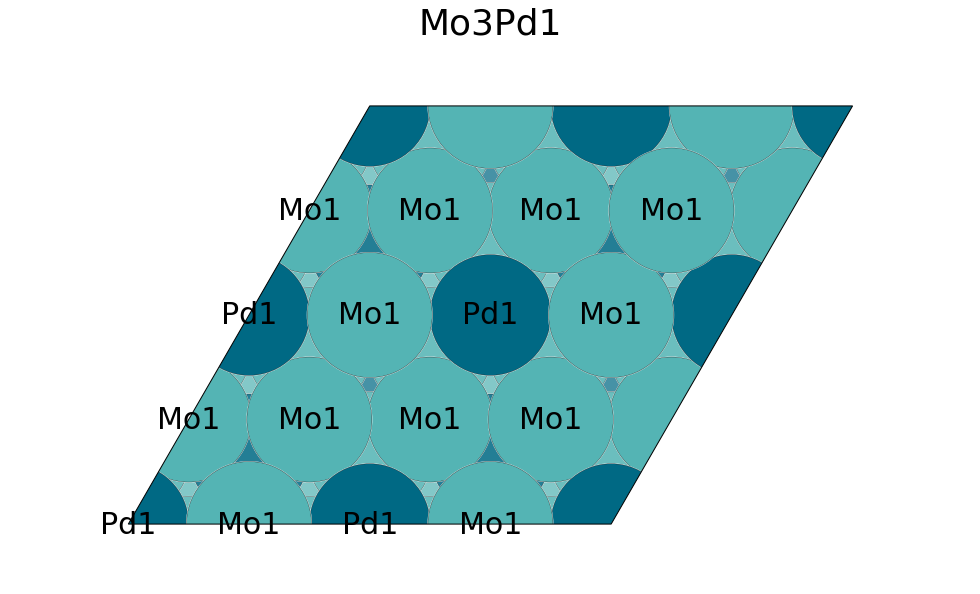

In [5]:
SA.show_slab('slab', slab_index=1)

In [6]:
SA.view_slab('slab',1)

## Search for adsorption sites
Firstly, **find_adsorption_site** is used to find the adsorption site on each slab. The key parameters are:
- **distance**：The distance of the adsorption site from the surface
- **refer_layer**：Which layer is used as the surface to find the adsorption site, the default is the highest layer
- **site_type_precision**：The accuracy of determining whether the adsorption sites of the same index on different slabs are in the same location.

After finding the adsorption sites, the indexes of different adsorption sites will be given, indicating that the adsorption sites corresponding to these indexes are likely to correspond to different positions on different surfaces. Try not to use them when adding adsorption molecules. If there are too many unequal adsorption sites, you can modify the **site_type_precision** of the corresponding adsorption site type to improve the accuracy of the judgment.

If there is additional demand, custom sites can be added by **add_adsorption_sites**.

In [7]:
SA.find_adsorption_site(distance=2,
                       site_type_precision=[3, 3, 3])

--------------------------Find_Adsorption_Site---------------------------
                      Site distance : 2
               Find adsorption site : compeleted
                 Unique site number : ontop: 2, bridge: 3, hollow: 4
                  Total site number : ontop: 16, bridge: 48, hollow: 32
                Unequal  top   site : {9, 10, 11, 12, 13, 14}
                Unequal bridge site : {44, 45, 46, 47}
                Unequal hollow site : set()
-----------------------------------END-----------------------------------


The following is a visualization of adsorption sites, you can visualize the symmetric unique adsorption sites, you can also visualize all adsorption sites.When molecules are added, the index when visualizing all adsorption sites is used.

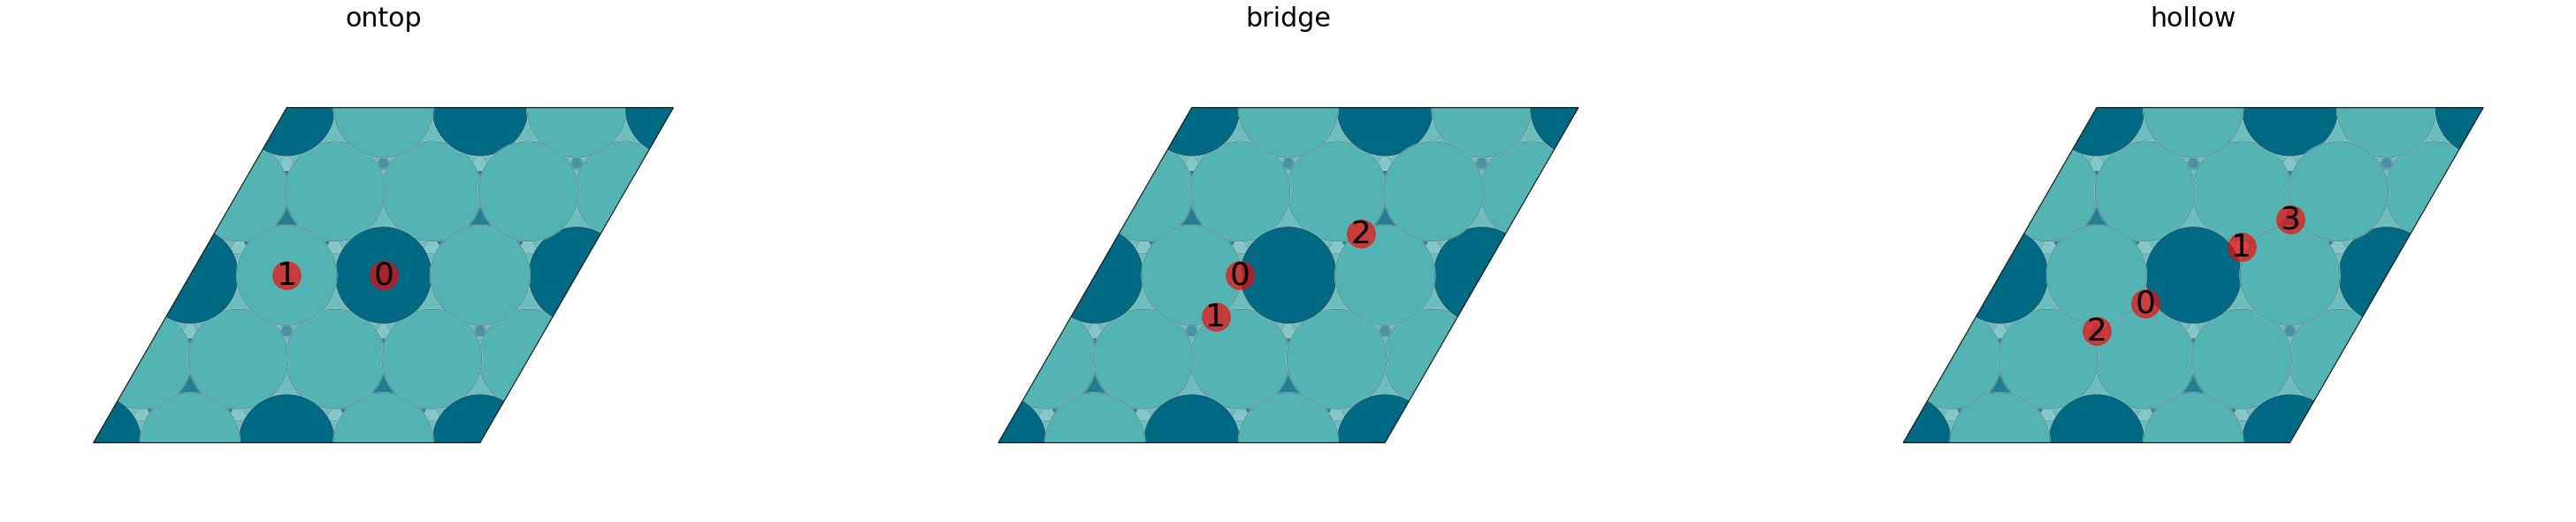

In [8]:
SA.show_slab('unique',slab_index=1)

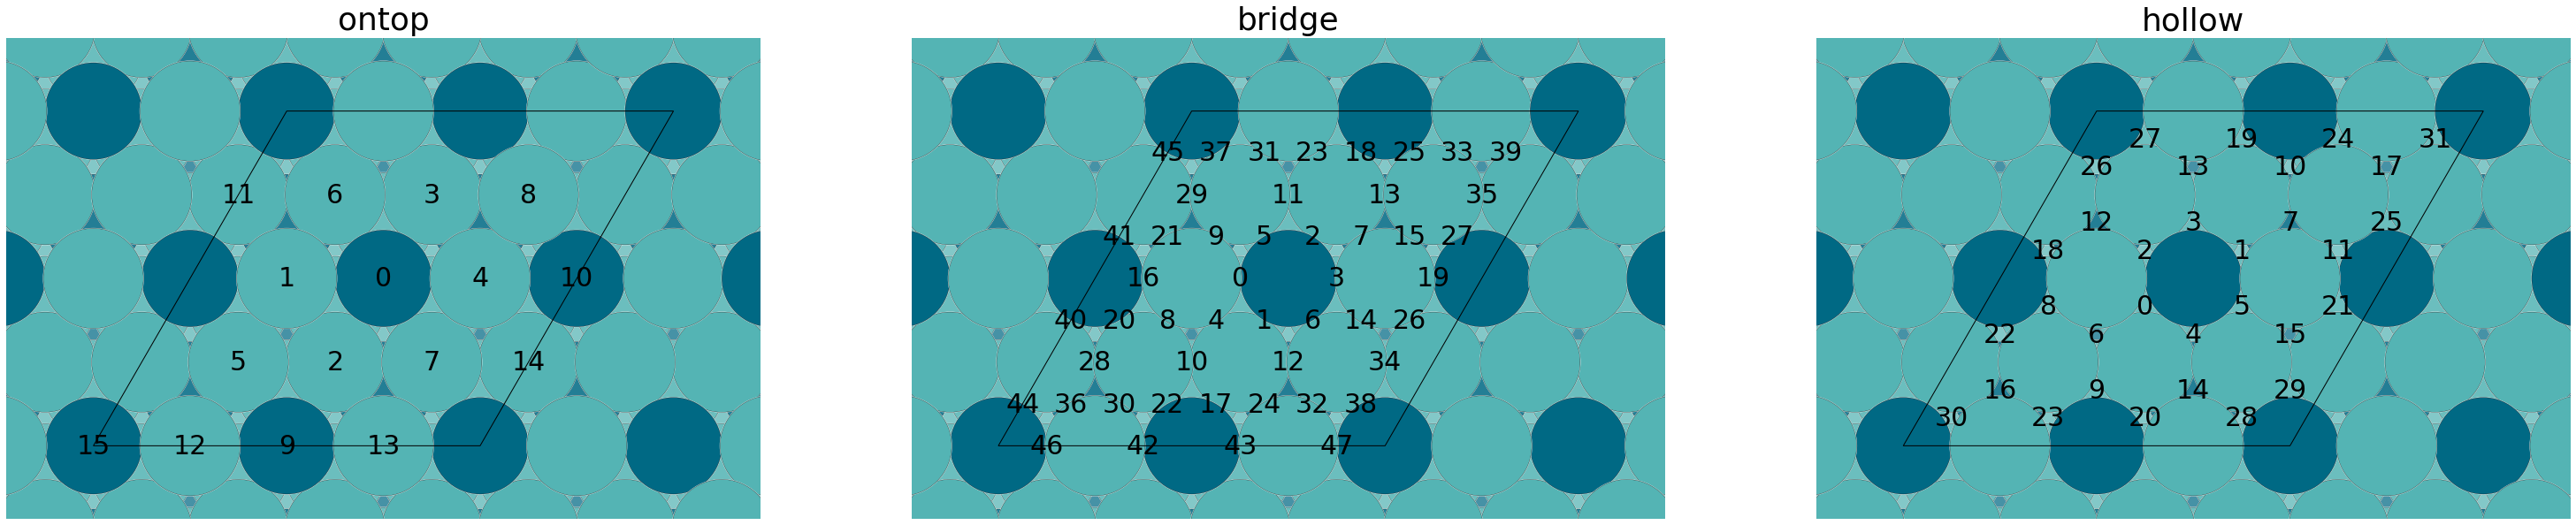

In [9]:
SA.show_slab('site',slab_index=1)

## Add the adsorbate
Once you have the adsorption site, you can add the adsorption to it. You need to give a list of the molecules to be added, the rotation Angle and the adsorption site.

The simple way to add is as follows: first create a large list [ ], then add a secondary list to represent a newly added molecule, [ [ ],... ] . Then add 3 lists to the secondary list, respectively representing adsorption molecules, rotation angles and adsorption sites. Here, only 1 adsorption molecule is given each time, and the rotation angles and adsorption sites correspond one by one. The adsorption site is written as an index plus 't', 'b', or 'h', corresponding to the top, bridge, and hollow positions, respectively. For more details, use the help command.

The molecules that can be added can be directly queried by running **uniform_name_dict()**. The molecules that can be added are selected from the values in the dictionary, usually they correspond to different adsorption configurations of the same molecule. New molecular structures can be customized in **dataset** scripts.

In [10]:
SA.add_molecule([
    [['N2v'], [0, 0], ['0t', '1t']],
    [['NNHh'], [30, 90], ['1b', '11b']]
])

------------------------------Add_Molecule-------------------------------
                       Add Molecule : compeleted
               Ads structure / slab : 4
                Total Ads structure : 12
-----------------------------------END-----------------------------------


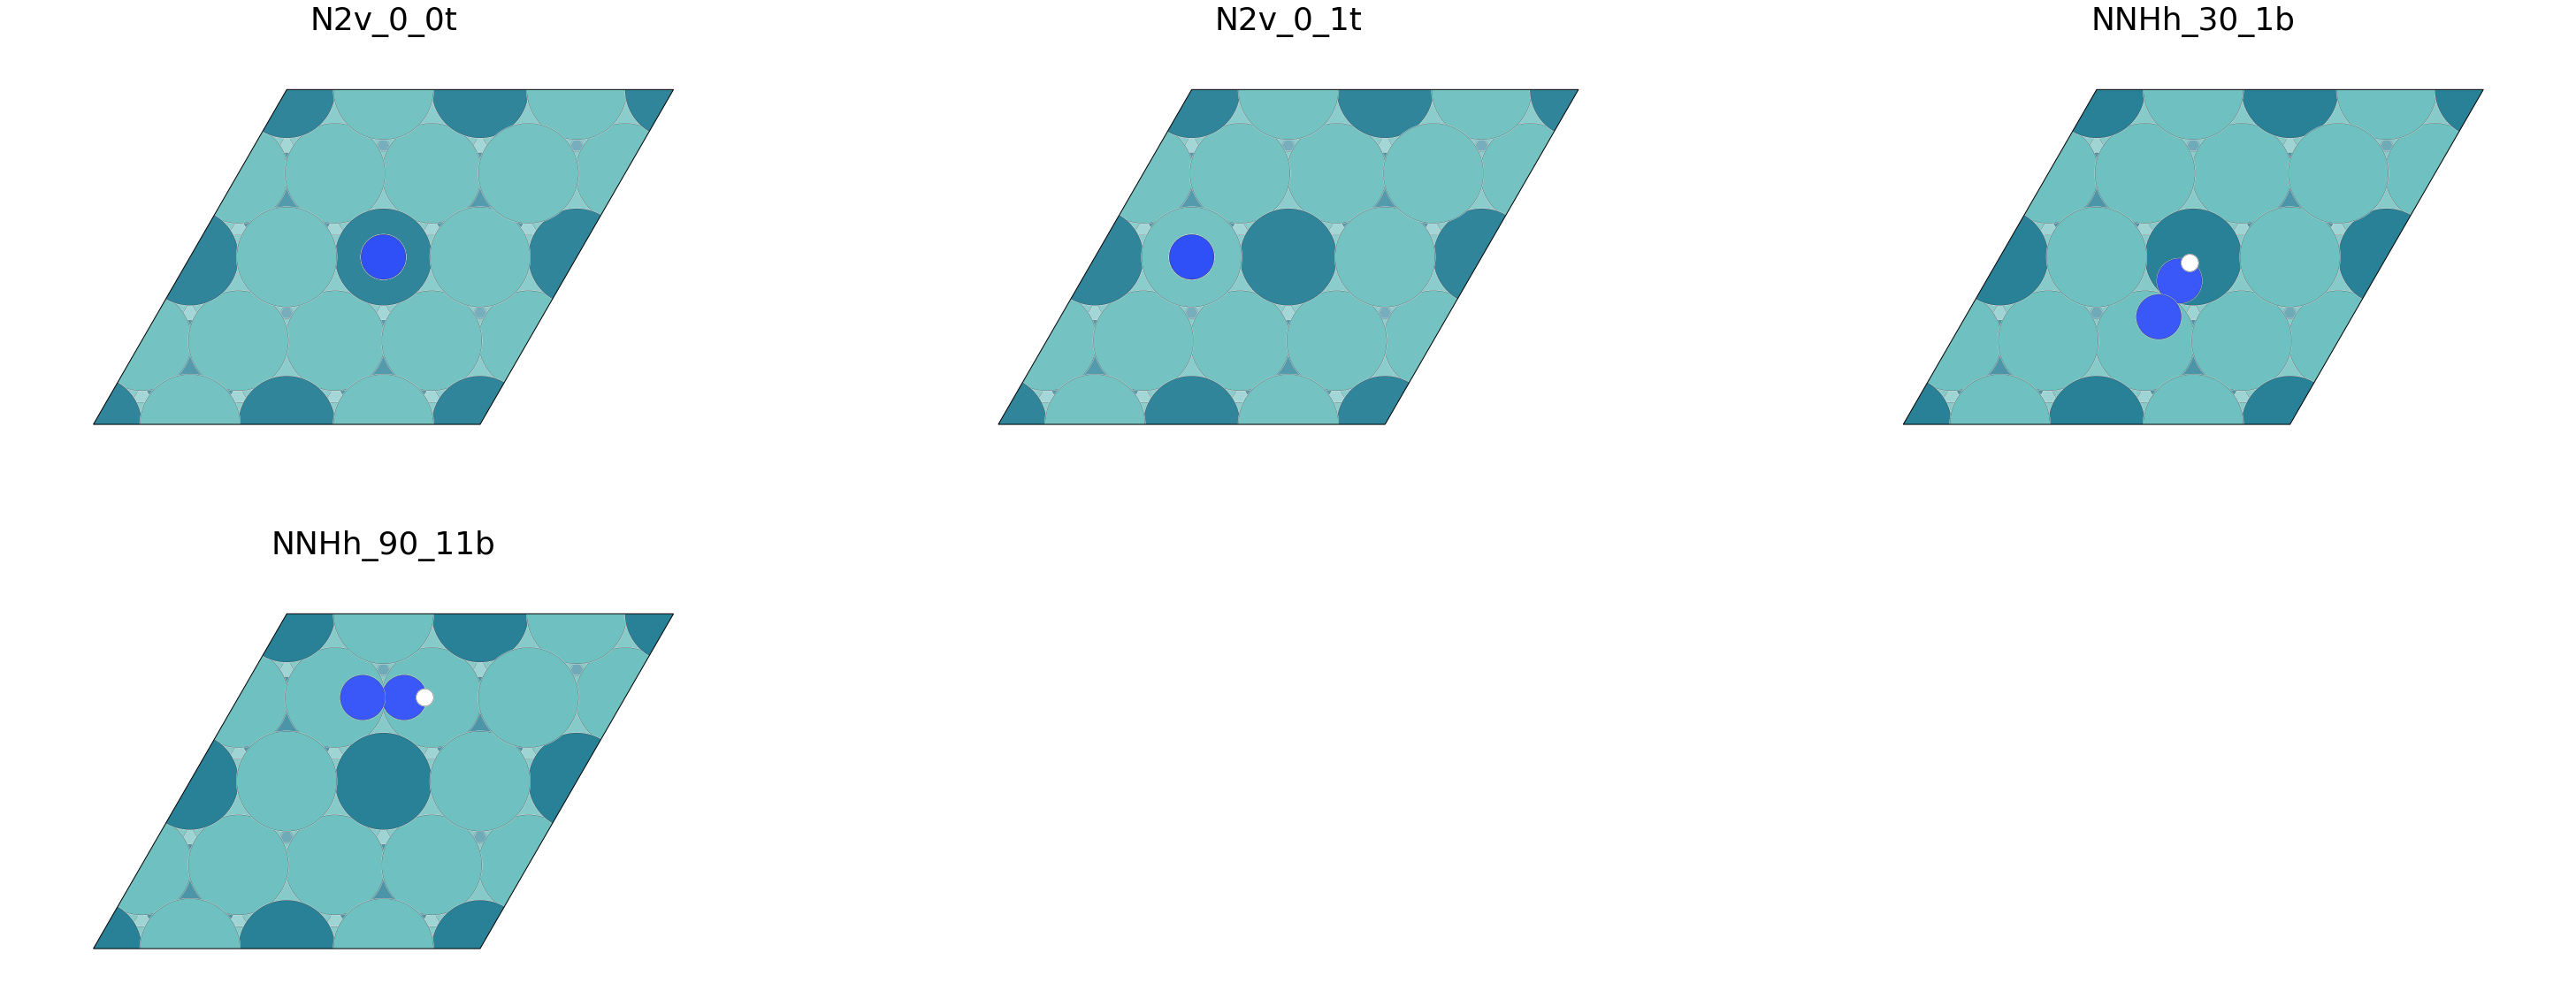

In [11]:
SA.show_slab('adss', slab_index=1)

## Save Structures

In [12]:
SA.save_file('slab')

--------------------------------Save_File--------------------------------
                          Save File : example/slab\Pure_slab
                        File number : 3
-----------------------------------END-----------------------------------


In [13]:
SA.save_file('adss')

--------------------------------Save_File--------------------------------
                          Save File : example/slab\Ads_structures
                        File number : 12
-----------------------------------END-----------------------------------


# Layer_Divide_Process
This class can read a slab, analyze its number of layers, and then translate, rotate, and delete atoms in the corresponding number of layers.

First read one of the slab just cleave and determine its number of layers. There are two ways to judge, one is to judge by the difference between z coordinates of each atom, and atom whose coordinate difference is within a certain range of the lowest atom in the layer is regarded as the same layer; the second is to round the atomic coordinates forward and take the same coordinates as the same layer.

In [14]:
LDP = Layer_Divide_Process()
LDP.load_slab(r'example\slab\Pure_slab\Cu3Ag1.vasp')

--------------------------------Load Slab--------------------------------
                   Load structure   : Compeleted
                   Slab atom number : 64
-----------------------------------End-----------------------------------


In [15]:
LDP.divide_layer(identify_method='threshold', method_parameter=0.36)

------------------------------Devide Layer-------------------------------
                       Layer number : 4
                       Layer refer  : [7.5, 9.68, 11.86, 14.05]
                       Layer bar    : [16, 16, 16, 16]
-----------------------------------End-----------------------------------


After the layer is divided, you can use **identify_layer** to query the layer where an atom is located, or the corresponding atom of a layer.

In [16]:
LDP.identify_layer([1, 36, 2, 63, 45], by='atom')

[0, 2, 0, 2, 3]

In [17]:
LDP.identify_layer([3], by='layer')

[20, 21, 22, 23, 32, 33, 34, 35, 44, 45, 46, 47, 56, 57, 58, 59]

You can also use some functions to batch atoms in certain layers:

- **move_layer**: Translation
- **delete_layer**: Remove
- **rotate_layer**: Rotation
- **fix_layer**: Fix atoms

These operations are constantly added to a processing structure, and you can use these functions several times to get the final result you want. **view_structure** can be used at any time during processing to view the structure obtained at this time. Or use **reset_structure** to reset it to the state it was just read in. Finally, use **save_structure** to save the processed structure.   

It is best to put the **fix_layer** at the end of the execution, otherwise you may have problems with visualization. Also note that the number of layers corresponding to the atoms does not change during processing unless you redivide the layers.


It is shown below that **move_layer** is used to translate the surface atoms of the slab, selectively fix the translated structure and save the final configuration.


In [18]:
LDP.move_layer(layers=[3],
               vector=[0.66, 0, 0],
               is_frac=False)

In [19]:
LDP.view_structure()

In [20]:
LDP.fix_layer([0, 1], relax_dynamics=[True, True, False], fix_dynamics=[False, False, False])

In [21]:
LDP.save_structure('Cu3Ag1_move.vasp')

-----------------------------Save structure------------------------------
                         Saved file : E:\JupyterProjects\J-Scripts\example\slab\Pure_slab\Cu3Ag1_move.vasp
-----------------------------------END-----------------------------------
